In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Linear Regression from scratch using gradient descent

In [ ]:
from IPython.display import display, Math
display('LinearRegression equation formula but now we are using it for regression w-> weights and b-> bias')
display(Math(r"\hat{y} = w X + b"))
display('Mean squared error formula which we use for regression and partial derivatives to find weights and bias from scratch')
display(Math(r"MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2"))
display("partial derivative of MSE with respect to w which lets us move to the local minimum of the cost function")
display(Math(r"\frac{\partial MSE}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) X_i"))
display("partial derivative of MSE with respect to b which lets us move to the local minimum of the cost function")
display(Math(r"\frac{\partial MSE}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)"))


'LinearRegression equation formula but now we are using it for regression w-> weights and b-> bias'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=10):
        self.lr = lr
        self.n_iters = n_iters
        self.weight = 0  # scalar for 1D
        self.bias = 0

    def fit(self, X, y):
        # flatten X to 1D if it is 2D with one column
        X = X.flatten()
        n_samples = X.shape[0]

        for _ in range(self.n_iters):
            y_pred = self.weight * X + self.bias
            dw = (1/n_samples) * np.sum((y_pred - y) * X)
            db = (1/n_samples) * np.sum(y_pred - y)
            self.weight -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        X = X.flatten()
        return self.weight * X + self.bias
    
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

In [13]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X,y=make_regression(n_samples=1000,n_features=1,noise=20,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

regressor=LinearRegression(lr=0.01,n_iters=1000)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [15]:
print(regressor.mse(y_test,y_pred))

431.59713015615023


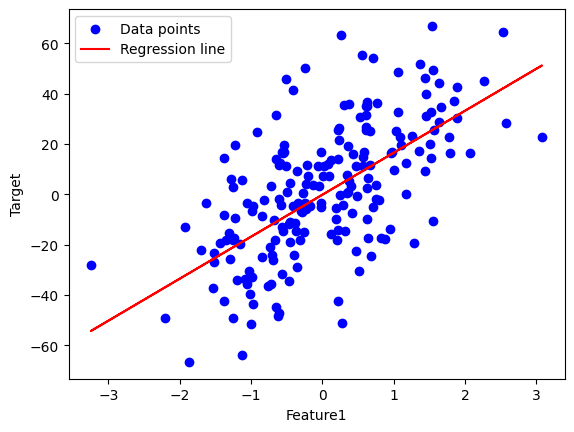

Weight: 16.68344458998094
Bias: -0.18483467990684654


In [16]:
plt.scatter(X_test, y_test, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.legend()
plt.show()

print("Weight:", regressor.weight)
print("Bias:", regressor.bias)

In [17]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print(regressor.score(X_test,y_test))

0.375734632146025


In [18]:
regressor.coef_

array([16.68480472])

In [19]:
regressor.intercept_

np.float64(-0.18500205394225427)